### **EDA: PARAMOUNT PLUS**
#### En este EDA vamos analizar el dataset de las películas y series de Paramount, profundizando en sus ratings, tipo de producción, edades, géneros, duración, popularidad, críticas, años de lanzamiento...

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import folium
from folium.plugins import HeatMap, TimestampedGeoJson
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import re

df_paramount = pd.read_csv("titles.csv")
series = df_paramount[df_paramount['type'] == "SHOW"]
peliculas = df_paramount[df_paramount['type'] == "MOVIE"]


### Inspección de los datos
Primero de todo mostramos los datos de los que contamos, sus características, columnas y de qué tipo son los datos para poder trabajar con ellos

In [73]:
df_paramount.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,NaN,66,"['thriller', 'drama', 'crime']",['US'],NaN,tt0037638,7.3,17233.0,7.757,7.2
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,NaN,57,"['crime', 'drama']",['US'],NaN,tt0026683,4.0,864.0,3.748,3.6
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,NaN,197,"['history', 'drama']",['US'],NaN,tt0006864,7.7,15242.0,9.412,7.2


In [74]:
df_paramount.shape

(2825, 15)

Podemos apreciar que las columnas que tienen datos numéricos tienen el tipo correcto int o float.

In [75]:
df_paramount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2825 entries, 0 to 2824
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2825 non-null   object 
 1   title                 2825 non-null   object 
 2   type                  2825 non-null   object 
 3   description           2812 non-null   object 
 4   release_year          2825 non-null   int64  
 5   age_certification     1302 non-null   object 
 6   runtime               2825 non-null   int64  
 7   genres                2825 non-null   object 
 8   production_countries  2825 non-null   object 
 9   seasons               626 non-null    float64
 10  imdb_id               2666 non-null   object 
 11  imdb_score            2613 non-null   float64
 12  imdb_votes            2613 non-null   float64
 13  tmdb_popularity       2768 non-null   float64
 14  tmdb_score            2337 non-null   float64
dtypes: float64(5), int64(

Vemos los valores estadísticos de las producciones de paramount.

In [76]:
df_paramount.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,2825.000000,2825.000000,626.000000,2613.000000,2.613000e+03,2768.000000,2337.000000
mean,1990.700177,72.254867,3.980831,6.042863,2.223876e+04,13.043838,6.045528
std,31.391022,30.068739,5.411657,1.275331,1.158232e+05,96.294178,1.484901
min,1912.000000,1.000000,1.000000,1.700000,5.000000e+00,0.009442,1.000000
25%,1965.000000,48.000000,1.000000,5.300000,1.480000e+02,1.266750,5.100000
50%,2007.000000,75.000000,2.000000,6.100000,5.480000e+02,2.620500,6.100000
75%,2017.000000,93.000000,4.000000,7.000000,3.092000e+03,6.957250,7.000000
max,2022.000000,228.000000,49.000000,9.400000,1.994599e+06,4579.160000,10.000000


In [77]:
df_paramount.describe(include='object')

,id,title,type,description,age_certification,genres,production_countries,imdb_id
count,2825,2825,2825,2812,1302,2825,2825,2666
unique,2825,2810,2,2810,11,858,138,2666
top,tm1032011,The Odd Couple,MOVIE,No overview found.,R,['documentation'],['US'],tt15392066
freq,1,3,2199,3,321,290,2183,1


### Valores Más Frecuentes
En este preanálisis, podemos observar que en cuanto a valores más frecuentes ha habido más producciones en el año 2017, hay más películas que series, la edad de calificación más común es R, el género documentation, las temporadas 1, el país estados unidos, la puntuación 94, los votos 10, popularidad 0,6 tiempo de producción 90 y calificación 6

In [78]:
def valores_frecuentes(data):
  total = data.count()
  tt = pd.DataFrame(total)
  tt.columns = ['Total']
  items = []
  vals = []
  for col in data.columns:
    item = data[col].value_counts().index[0]
    val = data[col].value_counts().values[0]
    items.append(item)
    vals.append(val)

  tt['Valores más frecuentes'] = items
  tt['Frecuencia'] = vals
  tt['Porcentaje'] = np.round(vals/total*100, 3)
  return np.transpose(tt)

valores_frecuentes(df_paramount)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
Total,2825,2825,2825,2812,2825,1302,2825,2825,2825,626,2666,2613,2613,2768,2337
Valores más frecuentes,tm1032011,The Odd Couple,MOVIE,No overview found.,2017,R,90,['documentation'],['US'],1.0,tt15392066,5.6,10.0,0.6,6.0
Frecuencia,1,3,2199,3,189,321,114,290,2183,225,1,94,15,269,126
Porcentaje,0.035,0.106,77.841,0.107,6.69,24.654,4.035,10.265,77.274,35.942,0.038,3.597,0.574,9.718,5.392


In [79]:
valores_frecuentes(series)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
Total,626,626,626,618,626,561,626,626,626,626,600,574,574,598,460
Valores más frecuentes,ts291097,Rugrats,SHOW,The talk show legend travels across the countr...,2015,TV-14,22,['documentation'],['US'],1.0,tt14315936,8.0,15.0,0.6,8.0
Frecuencia,1,2,626,1,55,165,62,104,487,225,1,22,7,78,33
Porcentaje,0.16,0.319,100.0,0.162,8.786,29.412,9.904,16.613,77.796,35.942,0.167,3.833,1.22,13.043,7.174


En cambio, solo en series, apreciamos diferencias como que el año más común es 2015, la certificación de edad TV-14 o que la calificación es 8.

### Valores únicos

In [80]:
def valores_unicos(data):
  total = data.count()
  tt = pd.DataFrame(total)
  tt.columns = ['Total']
  unicos = []
  for col in data.columns:
    unicos.append(data[col].nunique())
  tt['Valores únicos'] = unicos
  return np.transpose(tt)

valores_unicos(df_paramount)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
Total,2825,2825,2825,2812,2825,1302,2825,2825,2825,626,2666,2613,2613,2768,2337
Valores únicos,2825,2810,2,2810,110,11,156,858,138,30,2666,76,1627,2110,79


### Calidad de los datos
Contamos con unos datos con buena calidad ya que no hay ninguna fila duplicada y en cuanto a datos faltantes, podemos apreciar alguna descripción aunque con números insignificativos o las certificaciones de edad en producciones más antiguas. También apreciamos algunas faltas de datos en las puntuaciones de imdb pero en referencia al volumen de datos del dataset es insignificativo.

In [81]:
# Contar el número de filas duplicadas
num_duplicates = df_paramount.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicates}")

Número de filas duplicadas: 0


In [82]:
# Encontrar filas duplicadas
filas_duplicadas = df_paramount[df_paramount.duplicated()]

In [83]:
def valores_faltantes(data):
  total = data.isnull().sum()
  porcentaje = (data.isnull().sum()/data.isnull().count()*100)
  tt = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
  types = []
  for col in data.columns:
    dtype = str(data[col].dtype)
    types.append(dtype)
  tt['Tipos'] = types
  return np.transpose(tt)

valores_faltantes(df_paramount)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
Total,0,0,0,13,0,1523,0,0,0,2199,159,212,212,57,488
Porcentaje,0.0,0.0,0.0,0.460177,0.0,53.911504,0.0,0.0,0.0,77.840708,5.628319,7.504425,7.504425,2.017699,17.274336
Tipos,object,object,object,object,int64,object,int64,object,object,float64,object,float64,float64,float64,float64


In [84]:
df_paramount['release_year'].unique()

array([1926, 1940, 1945, 1936, 1916, 1946, 1925, 1932, 1928, 1921, 1950,
       1939, 1924, 1942, 1934, 1941, 1943, 1931, 1933, 1947, 1937, 1949,
       1938, 1919, 1944, 1927, 1922, 1920, 1918, 1929, 1935, 1914, 1948,
       1917, 1930, 1923, 1912, 1915, 1972, 1959, 1966, 1974, 1978, 1968,
       1951, 1955, 1975, 1979, 1977, 1961, 1976, 1969, 1973, 1980, 1952,
       1956, 1953, 1962, 1970, 1963, 1960, 1965, 1971, 1964, 1957, 1954,
       1967, 1958, 1986, 1990, 1987, 1981, 1982, 1989, 1984, 1985, 1988,
       1983, 2000, 1997, 1999, 1994, 1993, 1995, 1998, 1996, 1992, 1991,
       2009, 2004, 2005, 2003, 2001, 2010, 2008, 2002, 2007, 2006, 2012,
       2011, 2014, 2013, 2016, 2015, 2017, 2018, 2020, 2019, 2022, 2021])

### Análisis Univariante
Para empezar, comenzaremos viendo un análisis univariante de los datos viendo variable a variable y su contexto y después analizaremos varias variables respondiendo a las diferentes preguntas que nos plantea este EDA.
En estos gráficos podemos ver en primer lugar, los tipos de producción que recoge nuestro dataset en los cuales apreciamos que hay un mayor número de películas que de series, esto es debido a que a pesar de que en la actualidad está habiendo un repunte de producciones de series, tradicionalmente siempre ha prevalecido frente a las series por su menor tiempo de producción y que no requiere unos guiones tan extensos como las series.
En segundo lugar, podemos ver las producciones que se han estrenado a lo largo de los años, donde apreciamos el máximo en la década de los 2020, debido al auge de las plataformas de streaming y el cambio de tendencia a producir más contenido pero de peor calidad para competir en el gran mercado de plataformas de streaming, también podemos apreciar unos malos datos en la década de los 1930 debido a la gran depresión americana que se tradujo en una crisis.
En cuanto a la calificación de edad de las producciones predomina R que significa que menores de 17 deben verlo acompañados de adultos, esto se debe a que la mayoría de producciones son comedias que tienen esa calificación o pg-13 que es para mayores de 13 años que suele estar relacionado a sitcoms americanas. Finalmente lo menos común son producciones completamente restringidas a menores de 17 y hay un gran número de todos los públicos.
En el siguiente gráfico vemos la duración de las producciones, donde la mayoría se encuentran entre 50 y 100 minutos, aunque vemos un dato relevante en 30 minutos por los datos de series y en cuanto a géneros, no sorprende que géneros como historia, menos comerciales tengan menos producciones y lógicamente al ser una plataforma americana el que más predomina son las comedias, seguido de drama y oeste.
Por la misma razón, vemos que el país con más producciones es Estados unidos, seguido de países de habla inglesa como Reino Unido, Sudáfrica o Canadá que tiene un gran número de producciones debido a los bajos impuestos del país, por lo cual muchos estudios mueven sus producciones a Canadá.
En este gráfico vemos reflejado solo las series y sus temporadas, apreciando que predomina las series con 1 temporada ya que hay muchas series que no logran ser renovadas, ya que es difícil llegar a producciones con temporadas altas.
Finalmente, en cuanto a las puntuaciones de las producciones, vemos que la mayoría obtienen una puntuación de 6 y el abanico grande lo encontramos entre 4 y 8.


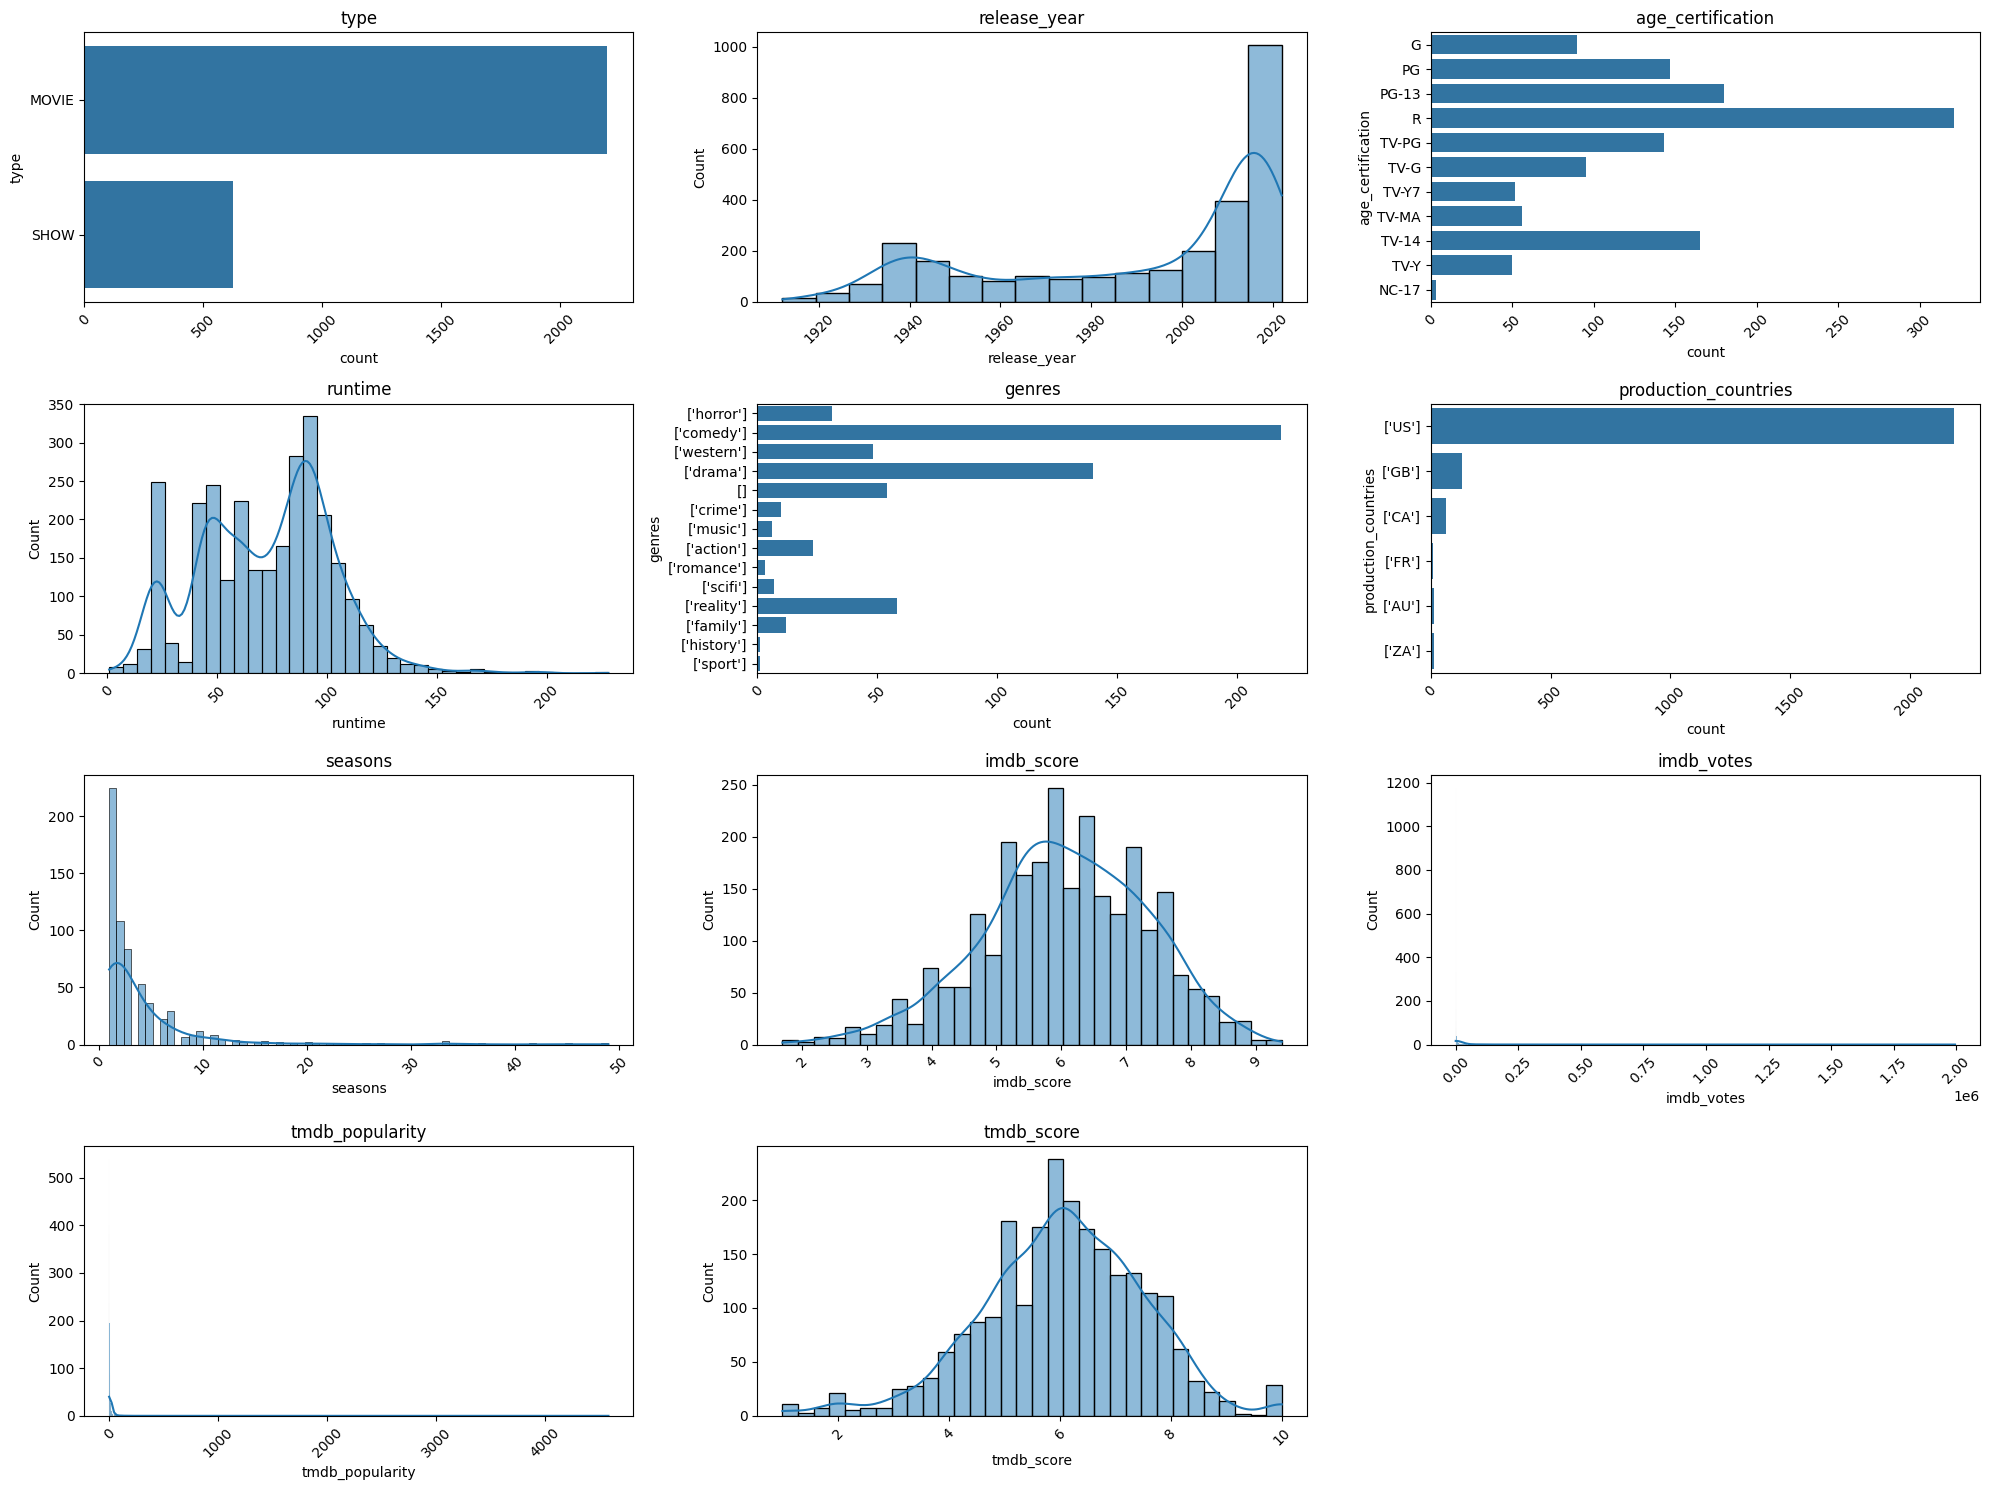

In [85]:

def plot_distribution(data_df, cols=5, width=20, height=15):
    # Crear una figura con el tamaño definido por los parámetros width y height
    fig = plt.figure(figsize=(width, height))

    # Calcular el número de filas necesarias para acomodar todas las columnas en la gráfica
    rows = math.ceil((data_df.shape[1] - 3) / cols)  # Excluye tres columnas (title, imdb_id, description)

    # Contador para los subplots
    plot_index = 1

    # Iterar sobre cada columna en el dataset, excepto alguna
    for column in data_df.columns:
        if column in ['title', 'imdb_id', 'description','id']:
            continue  # Omitir las columnas especificadas

        # Crear subplots, añadiendo cada uno en su posición dentro de la cuadrícula de filas y columnas
        ax = fig.add_subplot(rows, cols, plot_index)
        plot_index += 1

        # Establecer el título de cada subplot como el nombre de la columna actual
        ax.set_title(column)

        # Filtrar valores específicos para 'production_countries'
        if column == 'production_countries':
            filtered_df = data_df[data_df['production_countries'].isin(["['US']", "['GB']", "['FR']", "['SP']", "['CA']", "['ZA']", "['AU']"])]
            sns.countplot(data=filtered_df, y=column, ax=ax)
            plt.xticks(rotation=45)
        elif column == 'genres':
            # Filtrar géneros con longitud de caracteres menor a 12
            filtered_df = data_df[data_df['genres'].apply(lambda x: len(str(x)) < 12)]
            sns.countplot(data=filtered_df, y=column, ax=ax)
            plt.xticks(rotation=45)
        elif data_df.dtypes[column] == object:
            # Usar un gráfico de barras (countplot) para columnas categóricas
            sns.countplot(data=data_df, y=column, ax=ax)
            plt.xticks(rotation=45)
        else:
            # Usar un histograma con KDE para columnas numéricas
            sns.histplot(data_df[column], ax=ax, kde=True)
            plt.xticks(rotation=45)

    # Ajustar el layout de la figura para evitar solapamientos entre subplots
    plt.tight_layout()

# Llamar a la función con el DataFrame
plot_distribution(df_paramount, cols=3)

### ¿Qué género en series produce más temporadas?
La primera pregunta que me hice analizando los datos fue si los géneros de cada producción jugaba un papel importante en las puntuaciones de la producción o en las temporadas producidas, llegando a la conclusión de que los géneros que más temporadas producen son realities y comedia a pesar de que muchísimas producciones de esos géneros se quedan en bajas temporadas y los géneros a los que menos temporadas llegan son drama, música o crimen.

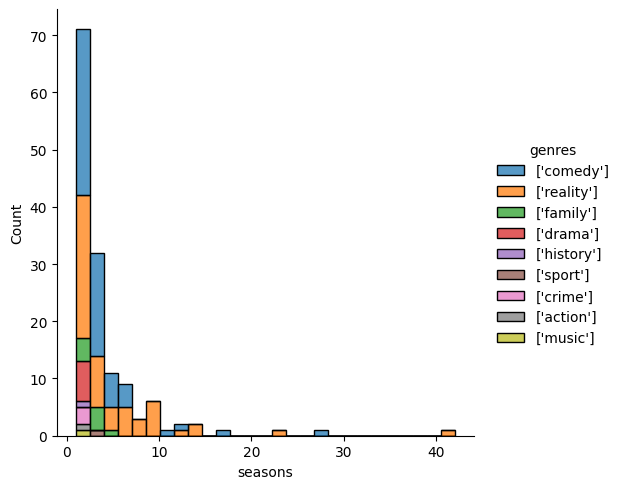

In [86]:
filtroSeries = series[series['genres'].apply(lambda x: len(str(x)) < 12 and len(str(x)) > 3)]
sns.displot(data=filtroSeries,
            x="seasons", #Variable numérica
            hue="genres", #Variable categórica
            #col="genres", #Gráficos por género
            multiple="stack") #Barras apiladas

### ¿Qué género obtiene las mejores puntuaciones de IMDB?
Lo mismo pasa en cuanto a la puntuación, reality y comedia son los que llegan a puntuaciones más altas.

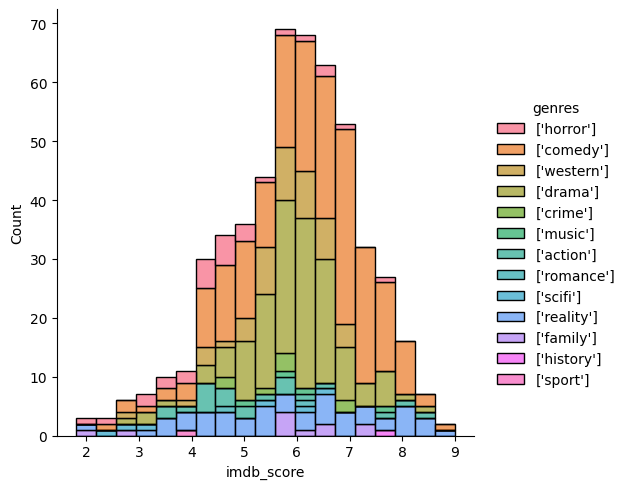

In [87]:
filtroGeneros = df_paramount[df_paramount['genres'].apply(lambda x: len(str(x)) < 12 and len(str(x)) > 3)]
sns.displot(data=filtroGeneros,
            x="imdb_score",
            hue="genres",
            #col="genres",
            multiple="stack")

### ¿Cuáles son las calificaciones de edad de los diferentes géneros a lo largo del tiempo?
Después me pregunté si las calificaciones de edad variaban dependiendo del género y su evolución a lo largo de los años, llegando a la conclusión de que producciones del género de familia obtenían calificaciones TV-Y que es para público infantil y han sido producidas más en la actualidad, ya que antes de los 70 se producía más terror, comedia y drama con calificaciones para todos los públicos, cosa que cambia a partir de los 70 y toman una calificación R de adultos. 

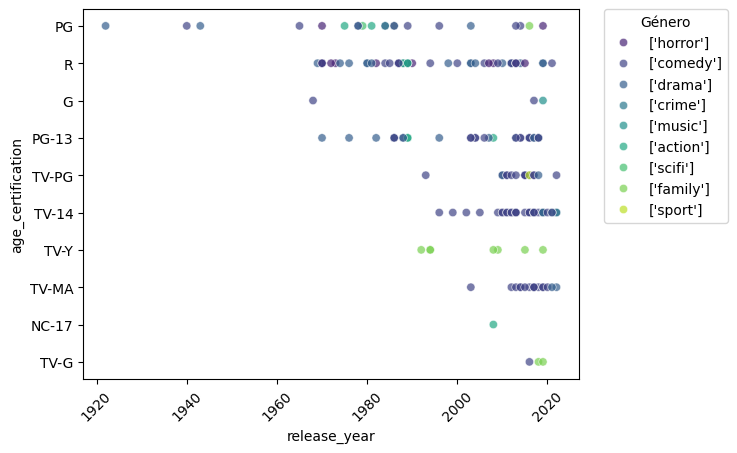

In [88]:
filtroGeneros = df_paramount[df_paramount['genres'].apply(lambda x: len(str(x)) < 11 and len(str(x)) > 8)]
sns.scatterplot(
    data=filtroGeneros,
    x="release_year",        
    y="age_certification",          
    hue="genres",            # Diferenciar por género
    palette="viridis",
    alpha=0.7                # Transparencia para ver puntos superpuestos
)

# Mover la leyenda fuera del gráfico
plt.legend(title="Género", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.xticks(rotation=45)
plt.show()

### ¿Qué país produce más series y películas a lo largo de los años?
En cuanto a producciones por paises podemos observar una tendencia al alza en todos los paises, evolucionando a producir cada vez más series y películas a medida que pasa el tiempo y podemos observar que a partir de los 70 se suman más países a parte de Reino Unido y Estados Unidos como Francia, Australia o Sudáfrica.

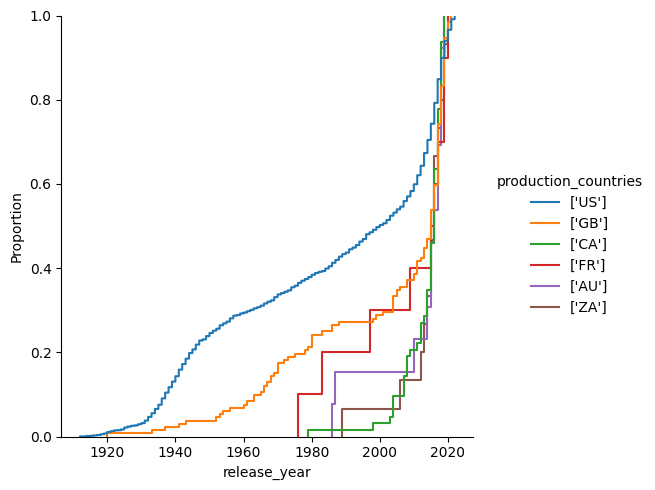

In [59]:
filtroPaises = df_paramount[df_paramount['production_countries'].isin(["['US']", "['GB']", "['FR']", "['CA']", "['ZA']", "['AU']"])]

sns.displot(
    data=filtroPaises,
    x="release_year",
    hue="production_countries",
    #col="production_countries",  # Gráficos por país
    kind="ecdf",                 
    facet_kws={'sharey': False}, # Permitir diferentes escalas en cada gráfico
)

### ¿Qué países tienen mejores puntuaciones de IMDB?
En este gráfico podemos ver que a puntuaciones superiores a 9 solo llega estados unidos en azul, ya que es la mayor productora de cine y entre 8 y 9 tenemos algunas producciones de reino unido, después entre 7 y 8 ya aparecen países como Francia o Sudáfrica o Canadá y finalmente aparece Australia en producciones entre el 5 y el 6 de puntuación.

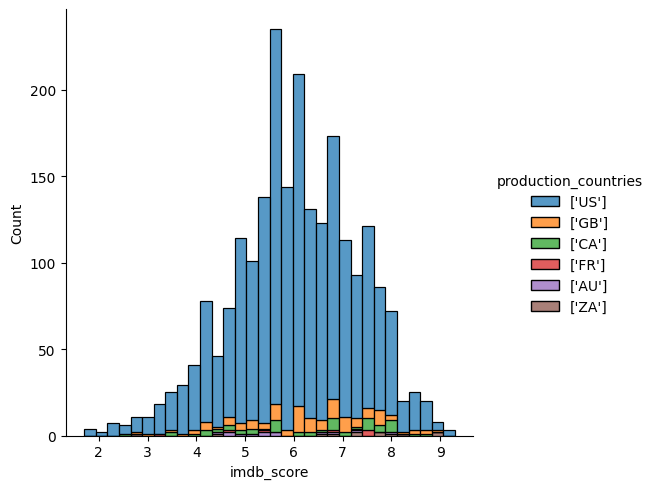

In [60]:
sns.displot(data=filtroPaises,
            x="imdb_score",
            hue="production_countries",
            multiple="stack")


### ¿Existe relación entre los votos de imdb y la calificación de imdb?

En este gráfico podemos apreciar que sí existe cierta relación entre las calificaciones de IMDB y el número de votos de los usuarios, ya que a pesar de que cuando hay pocos votos encontramos todo tipo de calificaciones, a medida que los votos aumentan, todos los valores de calificaciones con altos números de votos son por encima del 7. 

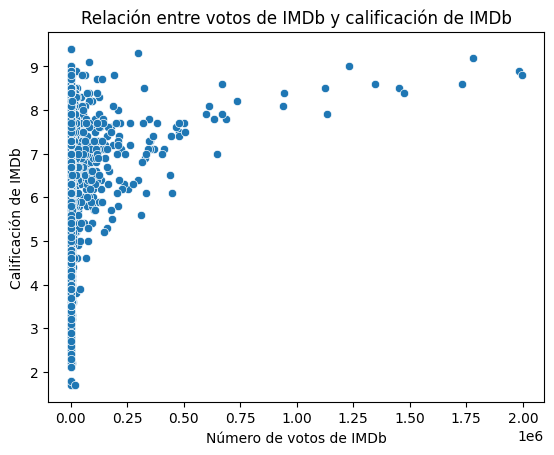

In [61]:
sns.scatterplot(data=df_paramount, x='imdb_votes', y='imdb_score')

# Personaliza la gráfica
plt.title('Relación entre votos de IMDb y calificación de IMDb')
plt.xlabel('Número de votos de IMDb')
plt.ylabel('Calificación de IMDb')

# Muestra la gráfica
plt.show()

### ¿Cuál es la diferencia entre puntuaciones de IMDB y TMDB?
A continuación, vamos a analizar la diferencia entre las puntuaciones que otorgan 2 diferentes webs de películas. En el primer gráfico podemos observar que las distribuciones son muy similares y viendo el segundo gráfico podemos corroborarlo.
En el segundo gráfico se aprecia una forma céntrica que está en línea ascendente, esto quiere decir que para la mayoría de valores de una puntuación le corresponde el mismo valor de la otra puntuación, lo cual tiene sentido ya que están evaluando las mismas películas, sin embargo podemos encontrar casos dispersos de la forma que tenemos en el centro ya que los críticos de ambas webs son diferentes, pero manteniendo una gran relación entre las 2.

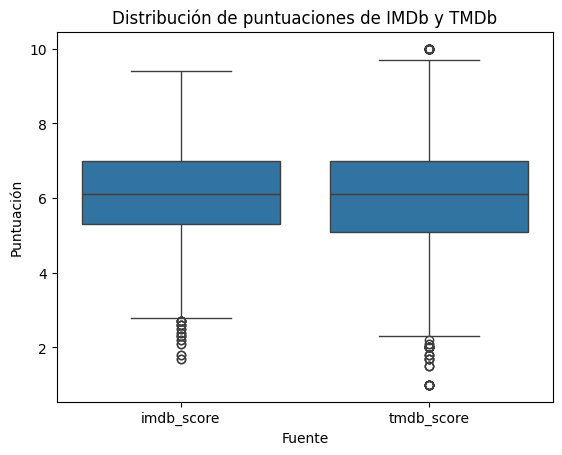

In [62]:
# Reshape de los datos para usar seaborn con un solo eje categórico
df_melted = df_paramount[['imdb_score', 'tmdb_score']].melt(var_name='Fuente', value_name='Puntuación')

# Gráfico de caja para comparar las puntuaciones
sns.boxplot(data=df_melted, x='Fuente', y='Puntuación')

# Personaliza la gráfica
plt.title('Distribución de puntuaciones de IMDb y TMDb')
plt.xlabel('Fuente')
plt.ylabel('Puntuación')

# Muestra la gráfica
plt.show()

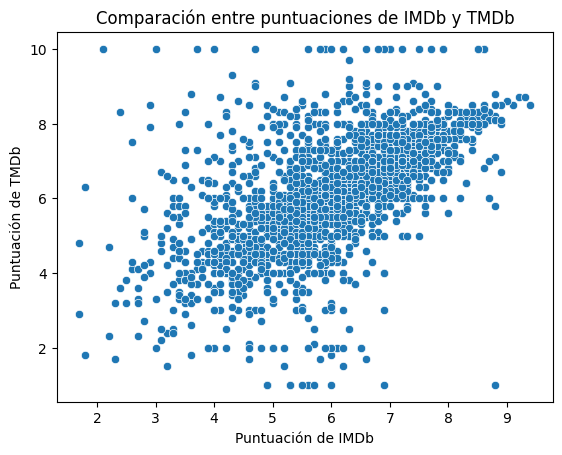

In [63]:
sns.scatterplot(data=df_paramount, x='imdb_score', y='tmdb_score')

# Personaliza la gráfica
plt.title('Comparación entre puntuaciones de IMDb y TMDb')
plt.xlabel('Puntuación de IMDb')
plt.ylabel('Puntuación de TMDb')

# Muestra la gráfica
plt.show()

### ¿Qué géneros predominan en los diferentes países?
En estos gráficos se pueden ver los géneros que predominan en 3 diferentes países, en primer lugar, podemos ver que en Estados Unidos gana el género de comedia con la gran producción de sitcoms americanas al igual que en Reino Unido, también de habla inglesa, tendencia que no se repite en Canadá, donde predominan los dramas.

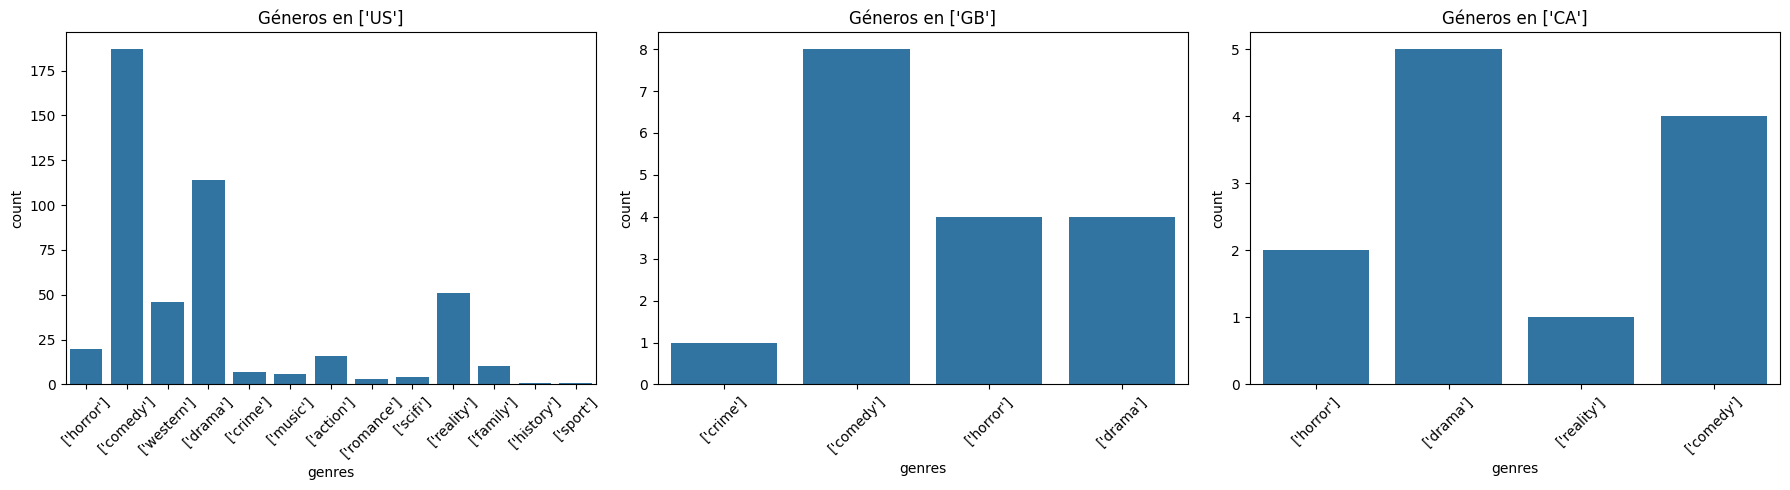

In [64]:
def graficar_generos_por_pais(df, paises):
    # Crear figura con una sola fila de subplots
    fig, axes = plt.subplots(1, len(paises), figsize=(6 * len(paises), 5))

    for i, pais in enumerate(paises):
        # Filtrar el DataFrame por el país actual y la longitud de los géneros
        df_pais = df[
            (df['production_countries'] == pais) &
            (df['genres'].apply(lambda x: 3 < len(str(x)) < 12))
        ]
        
        # Crear gráfico solo si hay datos
        if not df_pais.empty:
            sns.countplot(data=df_pais, x="genres", ax=axes[i])
            axes[i].set_title(f"Géneros en {pais}")
            axes[i].tick_params(axis='x', rotation=45)
        else:
            axes[i].text(0.5, 0.5, "Sin datos", ha='center')

    plt.tight_layout()
    plt.show()

# Lista de países a filtrar
paises_filtrados = ["['US']", "['GB']", "['CA']"]

# Llamada a la función
graficar_generos_por_pais(df_paramount, paises_filtrados)

### Mapa de calor de producciones de todos los países
Podemos observar de manera interactiva en este mapa que la mayoria de producciones se concentran en estados unidos, habiendo un foco importante en Europa. Corroborando gráficos anteriores que nos mostraban esta información

In [65]:
# Limpiar la columna 'production_countries' (solo si la columna existe)
if 'production_countries' in df_paramount.columns:
    df_paramount['production_countries'] = df_paramount['production_countries'].apply(
        lambda x: re.findall(r"'(\w+)'", x) if isinstance(x, str) else []
    )

# Filtrar filas con países no vacíos
df_paramount = df_paramount[df_paramount['production_countries'].str.len() > 0]

# Expandir cada país a una nueva fila
df_paramount = df_paramount.explode('production_countries')

# Inicializar geolocalizador y limitador de velocidad
geolocator = Nominatim(user_agent="geoapi")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Crear un diccionario para guardar coordenadas
country_coords = {}

# Obtener coordenadas para cada código de país único
for country_code in df_paramount['production_countries'].unique():
    location = geocode(country_code)
    if location:
        country_coords[country_code] = (location.latitude, location.longitude)

# Agregar una columna de coordenadas al DataFrame
df_paramount['coords'] = df_paramount['production_countries'].map(country_coords)

# Agrupar producciones por coordenadas (sin años)
heat_data = df_paramount.groupby('coords').size().reset_index(name='productions')

# Crear el mapa base
mapa = folium.Map(location=[20, 0], zoom_start=2)

# Preparar los datos para el HeatMap
heatmap_data = [
    [row['coords'][0], row['coords'][1], row['productions']] 
    for idx, row in heat_data.iterrows()
]

# Añadir el mapa de calor
HeatMap(heatmap_data).add_to(mapa)

# Guardar y mostrar el mapa
mapa.save("heatmap_productions.html")
mapa

### Créditos de las producciones
Analizamos los diferentes trabajadores de las producciones de Paramount.

In [66]:
df_creditos = pd.read_csv("credits.csv")
df_paramountCreditos = pd.merge(df_paramount, df_creditos, on='id', how='inner')
df_paramountCreditos.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,coords,person_id,name,character,role
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",US,NaN,tt0017925,8.2,89766.0,8.647,8.0,"(39.7837304, -100.445882)",21174,Buster Keaton,Johnny Gray,ACTOR
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",US,NaN,tt0017925,8.2,89766.0,8.647,8.0,"(39.7837304, -100.445882)",28713,Marion Mack,Annabelle Lee,ACTOR
2,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",US,NaN,tt0017925,8.2,89766.0,8.647,8.0,"(39.7837304, -100.445882)",28714,Glen Cavender,Captain Anderson,ACTOR


### ¿Cuántos actores han trabajado en cada país según el año?
En cuanto a los actores de las diferentes producciones, he analizado los actores agrupados por países en los diferentes años recogidos en el dataset, donde podemos apreciar que estados unidos tiene el mayor número de actores, lo cual tiene sentido debido a que es la mayor potencia productora. También vemos que hay ciertos números de actores procedentes de paises como Canada y Reino Unido en los que la mayoría de actores han trabajado en años más recientes, en concreto en la década de los 2010 a 2020, ya que predominan los colores amarillos.

<Figure size 1400x800 with 0 Axes>

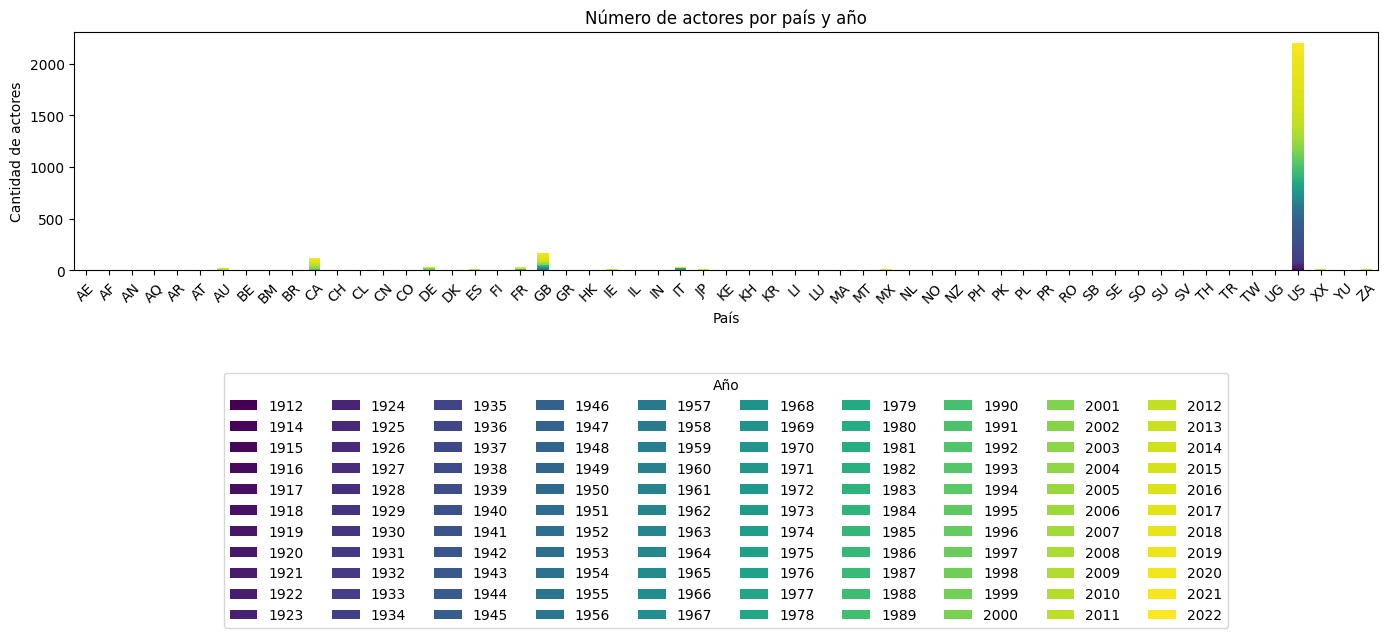

In [67]:
# Eliminar duplicados para que no se cuente varias veces el mismo país por película
df_unique = df_paramountCreditos.drop_duplicates(subset=['id', 'production_countries'])

# Contar el número de actores por país y año
actoresPaisYear = df_unique.groupby(['production_countries', 'release_year']).size().unstack(fill_value=0)

# Graficar los resultados
plt.figure(figsize=(14, 8))
actoresPaisYear.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Número de actores por país y año')
plt.xlabel('País')
plt.ylabel('Cantidad de actores')
plt.xticks(rotation=45)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
# Configurar la leyenda en la parte inferior en orientación horizontal
plt.legend(title='Año', bbox_to_anchor=(0.5, -0.4), loc='upper center', ncol=10, fancybox=True)
plt.tight_layout()  # Ajusta el espacio para que no se sobrepongan elementos
plt.show()

### ¿En qué género trabajan más actores?
En cuanto al número de actores por géneros podemos ver en este gráfico que la mayoría de actores trabajan en comedia, lo cual tiene sentido ya que es el género que más se produce, seguido de drama y películas del oeste. También podemos ver que musica y deporte tienen pocos actores debido a que ese tipo de producciones más documental o en directo no requieren de numerosos actores.

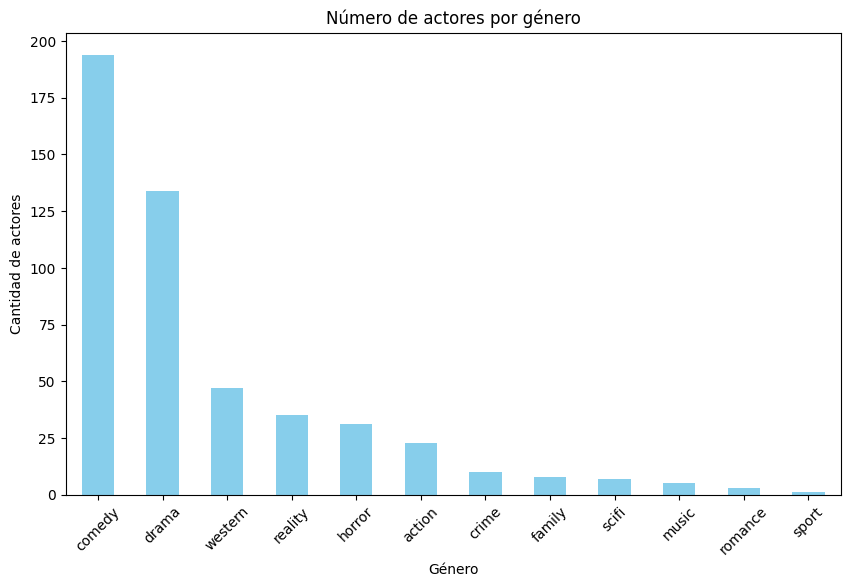

In [68]:
# Filtrar géneros con más de 3 y menos de 12 caracteres y limpiar los nombres
df_filtrado = df_paramountCreditos[df_paramountCreditos['genres'].str.len().between(4, 11)].copy()
df_filtrado.loc[:, 'genres'] = df_filtrado['genres'].str.replace(r"[\'\[\]]", "", regex=True)

# Eliminamos duplicados para que no se cuente varias veces el mismo género por película
df_unique = df_filtrado.drop_duplicates(subset=['id', 'genres'])

# Contamos el número de actores por género
actorGenero = df_unique['genres'].value_counts()

# Graficamos los resultados
plt.figure(figsize=(10, 6))
actorGenero.plot(kind='bar', color='skyblue')
plt.title('Número de actores por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de actores')
plt.xticks(rotation=45)
plt.show()

### ¿Las series con 1 temporada tienen peor puntuación en IMDB?
A pesar de solo llegar a una temporada, podemos observar en este gráfica que hay un gran número de series que cuentan con buenas calificaciones en IMDB entre 6 y 8 aunque pocas llegan a la máxima calificación entre 9 y 10.

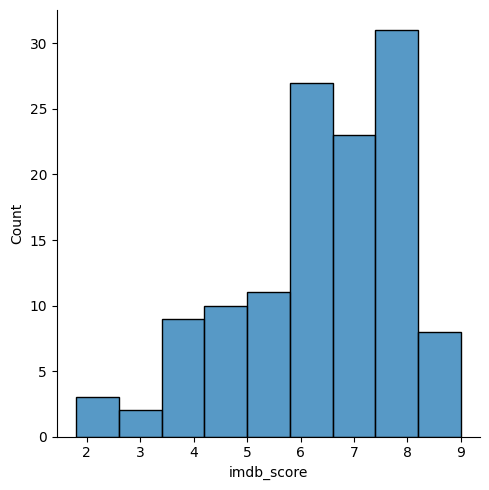

In [69]:
filtroTemporada = series[series['seasons'] == 1]
sns.displot(data=filtroSeries,
            x="imdb_score", #Variable numérica
            multiple="stack") #Barras apiladas

### ¿Las series de antes tienen mayor número de temporadas?
Comparando el número de temporadas y los años de estreno, podemos ver que que los valores más altos se encuentran entre 1955 y 2010, donde hay menor número de producciones pero con mayor número de altos valores en temporadas, llegando incluso a 40 o 50 temporadas, que seguramente corresponderán a realities. En cuanto los últimos años podemos apreciar un gran número de producciones pero todos aglutinados en un bajo número de temporadas, la mayoría menor a 5.

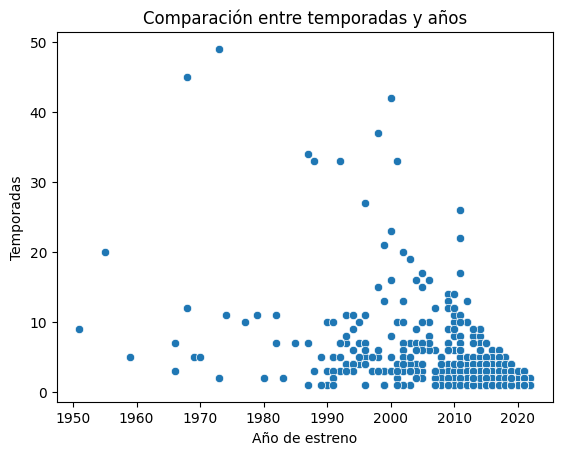

In [70]:
sns.scatterplot(data=series, x='release_year', y='seasons')

# Personaliza la gráfica
plt.title('Comparación entre temporadas y años')
plt.xlabel('Año de estreno')
plt.ylabel('Temporadas')

# Muestra la gráfica
plt.show()